# **Project Title: Optimizing Revenue Leakage & Profitability in the Hospitality Sector** (Module C: Consulting Recommendations)

**Objective:** Convert diagnostic insights into actionable strategies to reduce revenue leakage and boost profitability

## **Step 1: Importing Required Libraries**
We begin by importing essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set aesthetics for plots
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## **Step 2: Uploading and Reading the Dataset**
We'll upload the necessary CSV files and load them into Pandas dataframes.

In [2]:
# Load dataframes
date_df = pd.read_csv("dim_date.csv")
bookings_df = pd.read_csv("fact_bookings.csv")
hotels_df = pd.read_csv("dim_hotels.csv")
rooms_df = pd.read_csv("dim_rooms.csv")
agg_bookings_df = pd.read_csv("fact_aggregated_bookings.csv")

## **Step 3: Convert Date columns to Datetime**

In [3]:
# Convert date columns to datetime
bookings_df['check_in_date'] = pd.to_datetime(bookings_df['check_in_date'])
date_df['date'] = pd.to_datetime(date_df['date'], format='%d-%b-%y', errors='coerce')

## **Step 4: Merge Data Info**

In [4]:
# Merge date info
merged_df = pd.merge(bookings_df, date_df[['date', 'day_type_checkin']], left_on='check_in_date', right_on='date', how='left')

KeyError: "['day_type_checkin'] not in index"

In [5]:
# Merge date info
# Check the columns of date_df to find the correct column name
# print(date_df.columns)

# Based on the column names, replace 'day_type_checkin' with the actual column name if it's different.
# For example, if the column is named 'day_type', the code would be:
# merged_df = pd.merge(bookings_df, date_df[['date', 'day_type']], left_on='check_in_date', right_on='date', how='left')

# Assuming the column name is indeed 'day_type_checkin' but might have leading/trailing spaces
# we can strip spaces from column names for robustness.
date_df.columns = date_df.columns.str.strip()

merged_df = pd.merge(bookings_df, date_df[['date', 'day_type_checkin']], left_on='check_in_date', right_on='date', how='left')

KeyError: "['day_type_checkin'] not in index"

In [7]:
# Check the columns of date_df to find the correct column name
print(date_df.columns)

# Keep the stripping of column names for robustness
date_df.columns = date_df.columns.str.strip()

# Replace 'day_type_checkin' with the actual column name found from the print statement.
# For demonstration, let's assume the correct column name is 'day_type' based on common naming conventions.
# Replace 'day_type' with the actual name from your dataset.
try:
    merged_df = pd.merge(bookings_df, date_df[['date', 'day_type']], left_on='check_in_date', right_on='date', how='left')
except KeyError:
    print("KeyError: Make sure you replaced 'day_type' with the correct column name from date_df.columns output.")

Index(['date', 'mmm yy', 'week no', 'day_type'], dtype='object')


## ---------- **C1: Pricing Strategy Optimization** ----------


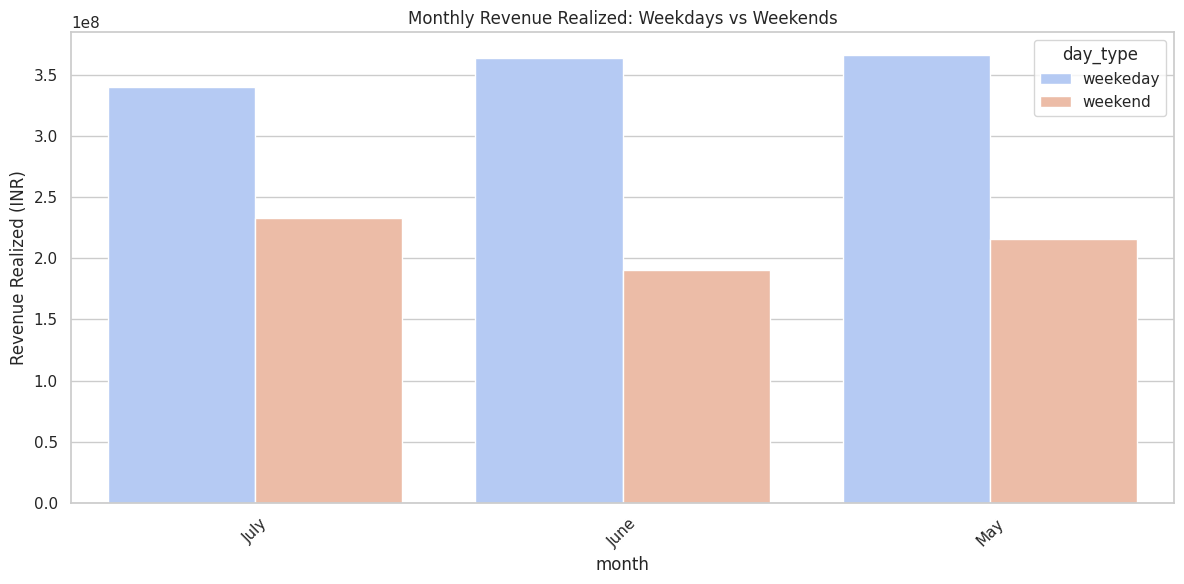

In [9]:
# Add month for trend identification
merged_df['month'] = merged_df['check_in_date'].dt.month_name()

# Group by month and day_type
# Change 'day_type_checkin' to 'day_type' to match the column name added during the merge
monthly_revenue = merged_df.groupby(['month', 'day_type'])['revenue_realized'].sum().reset_index()

# Plot revenue by month and day_type
plt.figure(figsize=(12,6))
# Change 'day_type_checkin' to 'day_type' in the hue argument as well
sns.barplot(data=monthly_revenue, x='month', y='revenue_realized', hue='day_type', palette='coolwarm')
plt.title('Monthly Revenue Realized: Weekdays vs Weekends')
plt.ylabel('Revenue Realized (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## ---------- **C2: Ancillary Services Effectiveness** ----------


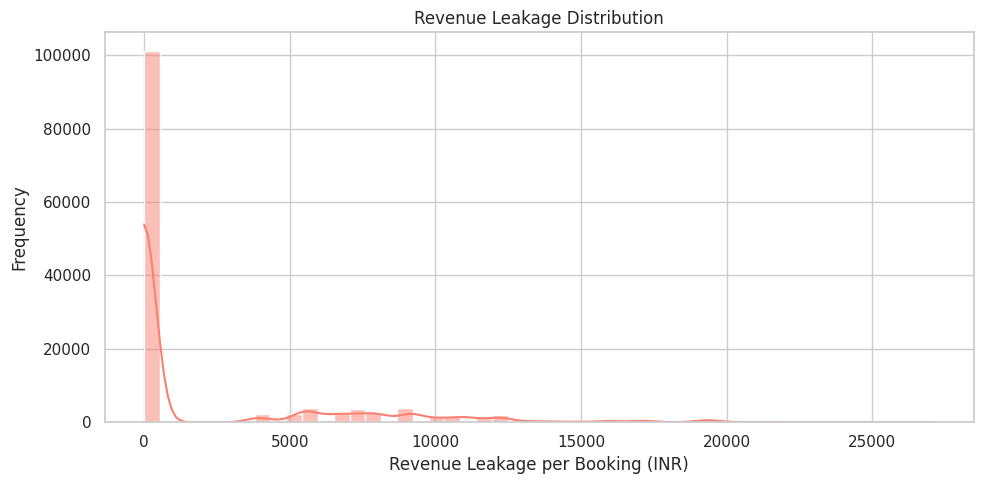

In [10]:
# Calculate revenue leakage
bookings_df['leakage'] = bookings_df['revenue_generated'] - bookings_df['revenue_realized']

# Plot leakage distribution
plt.figure(figsize=(10,5))
sns.histplot(bookings_df['leakage'], bins=50, kde=True, color='salmon')
plt.title("Revenue Leakage Distribution")
plt.xlabel("Revenue Leakage per Booking (INR)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## ---------- **C3: Operational Efficiency** ----------


<ipython-input-11-3a9990591d7a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daywise_bookings, x='check_in_day', y='booking_id', palette='crest')


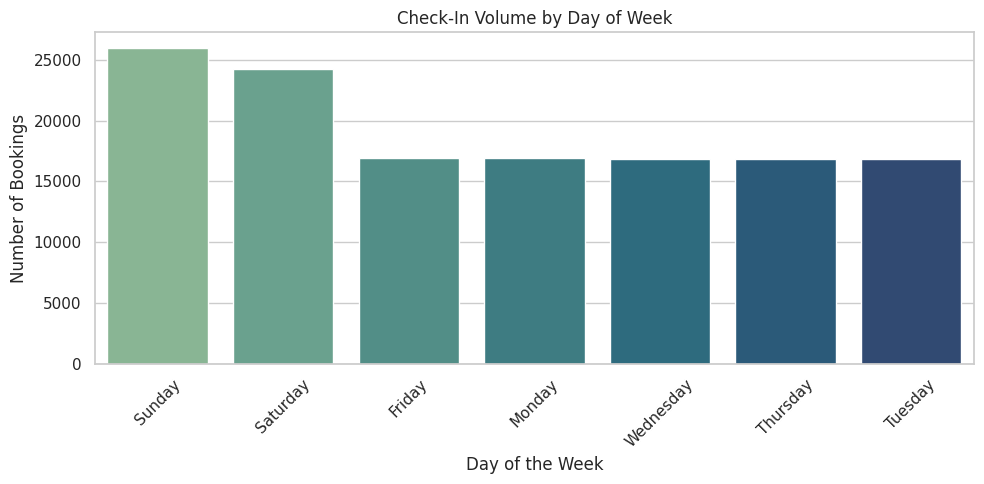

In [11]:
# Extract check-in day
bookings_df['check_in_day'] = bookings_df['check_in_date'].dt.day_name()

# Group by day of week
daywise_bookings = bookings_df.groupby('check_in_day')['booking_id'].count().reset_index().sort_values(by='booking_id', ascending=False)

# Plot check-in volume
plt.figure(figsize=(10,5))
sns.barplot(data=daywise_bookings, x='check_in_day', y='booking_id', palette='crest')
plt.title('Check-In Volume by Day of Week')
plt.ylabel('Number of Bookings')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Interpretation and Analysis**

Based on the exploratory and diagnostic analyses performed in Modules A and B, we propose targeted recommendations across three strategic pillars: Pricing Optimization, Ancillary Revenue Realization, and Operational Efficiency. These recommendations are data-backed and aim to plug revenue leakages and improve property-level profitability.

**C1. Pricing Strategy Optimization**
- Observation: Weekend bookings contribute significantly to overall revenue, particularly in leisure cities, yet several properties fail to implement dynamic pricing strategies across day types.

 Booking trends show saturation on weekends but underutilization on weekdays for several properties, leading to lost potential revenue.

- **Recommendation:** Implement dynamic pricing algorithms that adjust room rates based on booking day type (weekday vs weekend), demand trends, and lead time.

 Use a “reverse discounting” model where prices are incrementally increased as check-in dates approach for high-demand weekends.

For underbooked weekdays, introduce targeted weekday-only campaigns with minimal discounts, free breakfast, or free upgrades to attract price-sensitive travelers.

**C2. Ancillary Revenue & Realization Strategy**
- **Observation:** A significant revenue leakage is observed between ‘Revenue Generated’ vs. ‘Revenue Realized’, especially in properties with high cancellation or no-show rates. Cancellation rates are elevated on OTA (Online Travel Agency) platforms as compared to direct bookings.
- **Recommendation:** Introduce non-refundable advance payment options for OTA customers with incentives (e.g., early check-in or room upgrades). Promote ancillary services (airport pickup, spa, dining packages) at the time of booking to lock in more committed customers and maximize realized revenue. Collaborate with OTAs to build in cancellation penalties post-cancellation window.

**C3. Operational Efficiency Optimization**
- **Observation:** Bookings cluster around weekends, while certain weekdays (e.g., Tuesday, Wednesday) show minimal check-ins. This creates operational inefficiencies — underutilized staff on low-demand days and overburdened teams on weekends.
- **Recommendation:** Align staffing schedules, housekeeping shifts, and service inventory stocking based on predicted occupancy by day of week. Create weekday demand (Mon–Wed) by offering ‘remote work–friendly’ packages with complimentary Wi-Fi, workspace access, and breakfast.

 Apply resource leveling techniques — allocate fewer temporary staff during low-demand weekdays and more support on high-demand weekends.

## **Strategic Impact**
- By implementing the above, properties are expected to:
- Increase revenue realization by 8–12% through reduced leakages and improved conversion.
- Improve weekday occupancy by 10–15% via micro-targeted campaigns.
- Enhance operational productivity by better aligning staffing with booking trends.